<a href="https://colab.research.google.com/github/gopinathak-geek/Image-classification-with-pytorch/blob/main/Feed_forward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
# create sample input and output
x = torch.randn(100, 4)
y = torch.randn(100, 1)

In [3]:
from torch.utils.data import Dataset, DataLoader

# Dataset
class Dataset(Dataset):
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return len(self.x)


In [4]:
train_dataset = Dataset(x, y)
train_dataset[0]

(tensor([ 0.2102, -0.7499,  0.0947, -1.0889]), tensor([0.7577]))

In [5]:
Batch_SIZE = 10

# Dataloader
train_DataLoader = DataLoader(dataset=train_dataset, batch_size=Batch_SIZE, shuffle=True)

train_DataLoader


In [6]:
import torch.nn as nn

class LearningModel(nn.Module):
  def __init__(self):
    super(LearningModel, self).__init__()
    self.layer_1 = nn.Linear(4, 8) 
    self.layer_2 = nn.Linear(8, 16) 
    self.layer_3 = nn.Linear(16, 1) 
    self.relu = nn.ReLU()

  
  def forward(self, inputs):
    x = self.layer_1(inputs)
    x = self.relu(x)
    x = self.layer_2(x)
    x = self.relu(x)
    x = self.layer_3(x)
    return x

In [7]:
# Device

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [8]:
model = LearningModel()
model.to(device)
print(model)

LearningModel(
  (layer_1): Linear(in_features=4, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


In [9]:
LEARNING_RATE = 0.001
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)


LearningModel(
  (layer_1): Linear(in_features=4, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [15]:
EPOCHS = 100

history = []
for epoch in range(EPOCHS):
  model.train()
  epoch_loss = 0
  for x, y in train_DataLoader:
    x = x.to(device)
    y = y.to(device)

    y_pred = model(x)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
  history.append(epoch_loss/len(train_DataLoader))
  print(f'Epoch: {epoch+1:03} | Loss: {epoch_loss/len(train_DataLoader):.5f}')

Epoch: 001 | Loss: 0.51058
Epoch: 002 | Loss: 0.50701
Epoch: 003 | Loss: 0.50812
Epoch: 004 | Loss: 0.50659
Epoch: 005 | Loss: 0.50756
Epoch: 006 | Loss: 0.50524
Epoch: 007 | Loss: 0.50362
Epoch: 008 | Loss: 0.50488
Epoch: 009 | Loss: 0.50499
Epoch: 010 | Loss: 0.50295
Epoch: 011 | Loss: 0.50252
Epoch: 012 | Loss: 0.50066
Epoch: 013 | Loss: 0.50122
Epoch: 014 | Loss: 0.49951
Epoch: 015 | Loss: 0.49856
Epoch: 016 | Loss: 0.49772
Epoch: 017 | Loss: 0.49912
Epoch: 018 | Loss: 0.49735
Epoch: 019 | Loss: 0.49597
Epoch: 020 | Loss: 0.49551
Epoch: 021 | Loss: 0.49597
Epoch: 022 | Loss: 0.49568
Epoch: 023 | Loss: 0.49352
Epoch: 024 | Loss: 0.49337
Epoch: 025 | Loss: 0.49200
Epoch: 026 | Loss: 0.49280
Epoch: 027 | Loss: 0.49226
Epoch: 028 | Loss: 0.49007
Epoch: 029 | Loss: 0.48941
Epoch: 030 | Loss: 0.48959
Epoch: 031 | Loss: 0.48811
Epoch: 032 | Loss: 0.48772
Epoch: 033 | Loss: 0.48778
Epoch: 034 | Loss: 0.48566
Epoch: 035 | Loss: 0.48789
Epoch: 036 | Loss: 0.48648
Epoch: 037 | Loss: 0.48473
E

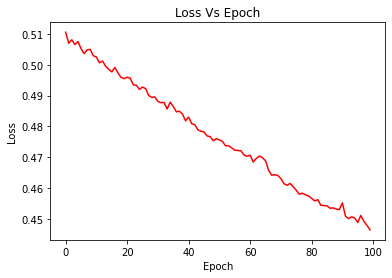

In [20]:
import matplotlib.pyplot as plt

plt.title('Loss Vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history, '-r')
